In [ ]:
from sklearn.datasets import make_circles
from keras.models import Sequential
from keras.layers import Dense
from matplotlib import pyplot
from numpy import where

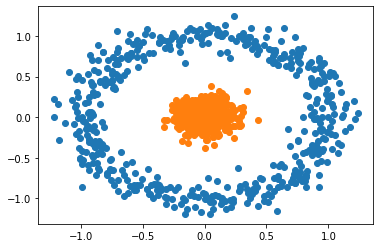

In [ ]:
# generate 2d classification dataset
X, y = make_circles(n_samples=1000, noise=0.1, random_state=1 ,factor=0.1)
# scatter plot, dots colored by class value
for i in range(2):
	samples_ix = where(y == i)
	pyplot.scatter(X[samples_ix, 0], X[samples_ix, 1])
pyplot.show()

In [ ]:
# split into train and test
n_test = 500
trainX, testX = X[:n_test, :], X[n_test:, :]
trainy, testy = y[:n_test], y[n_test:]

In [ ]:
# define model
model = Sequential()
model.add(Dense(100, input_shape=(2,), activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
# compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=300, verbose=0)

In [ ]:
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 1.000, Test: 1.000


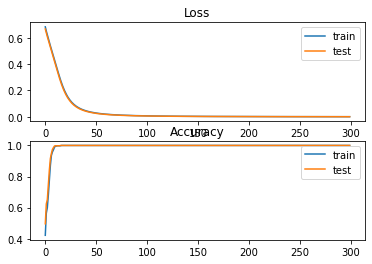

In [ ]:
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

In [ ]:
#Entrenamento para que tensoboard take data FORMA 1
import datetime,os
import tensorflow as tf 
from tensorboard.plugins.hparams import api as hp 
log_dir="logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(
    log_dir=log_dir,histogram_freq=1)
hparams_callback = hp.KerasCallback(log_dir,{
    'num_relu_units': 512,
    'dropout': 0.2
})

In [ ]:
!tensorboard dev upload --logdir logs \
    --name "Circle clasification" \
    --description "(optional) Simple comparison of several hyperparameters"

2022-08-28 04:27:50.670685: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Upload started and will continue reading any new data as it's added to the logdir.

To stop uploading, press Ctrl-C.

New experiment created. View your TensorBoard at: https://tensorboard.dev/experiment/9Yt0GuZMTXe1EhJ3xlCoJg/

[2022-08-28T04:27:50] Started scanning logdir.


Interrupted.
Traceback (most recent call last):
  File "/usr/local/bin/tensorboard", line 8, in <module>
    sys.exit(run_main())
  File "/usr/local/lib/python3.7/dist-packages/tensorboard/main.py", line 46, in run_main
    app.run(tensorboard.main, flags_parser=tensorboard.configure)
  File "/usr/local/lib/python3.7/dist-packages/absl/app.py", line 308, in run
    _run_main(main, args)
  File "/usr/local/lib/python3.7/dist-packages/absl/app.py", line 254, in _run_main
    sys.exit(main(argv))
  File "/usr/local/lib/python3.7/dist-packages/tensorboard/pro